In [4]:
import os
import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D # needed to plot 3D surfaces

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import pandas as pd

%matplotlib inline

In [5]:
def warmupExercise():
    A = np.eye(5)
    return A


In [6]:
warmupExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size

In [8]:
def plotData(x, y):
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    #fig = pyplot.figure()

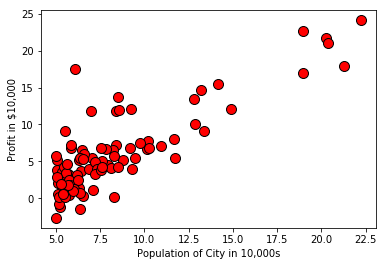

In [9]:
plotData(X, y)

In [10]:
X = np.stack([np.ones(m), X], axis=1)

In [11]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    
    predictions = X.dot(theta)
    squared_err = (predictions - y) ** 2

    J = 1/(2*m) * np.sum(squared_err)
    
    return J

In [12]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0,0] \n Cost computed  = %.2f' % J)
print('Expected cost value (approx) 32.07\n')

J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0,0] 
 Cost computed  = 32.07
Expected cost value (approx) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    
    J_history = []
    
    for i in range (num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [14]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


Text(0.5,1,'Cost function using GD')

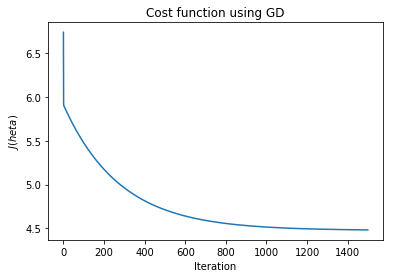

In [15]:
pyplot.plot(J_history)
pyplot.xlabel('Iteration')
pyplot.ylabel("$J(\theta)$")
pyplot.title('Cost function using GD')

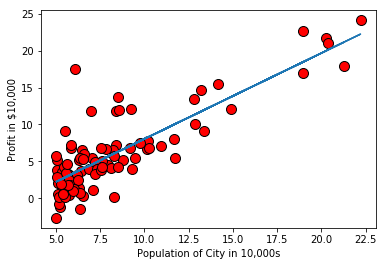

In [16]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
# pyplot.legend(['Training data', 'Linear regression']);

In [17]:
predict1 = np.dot([1, 3.5], theta)
print('For population = 35000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



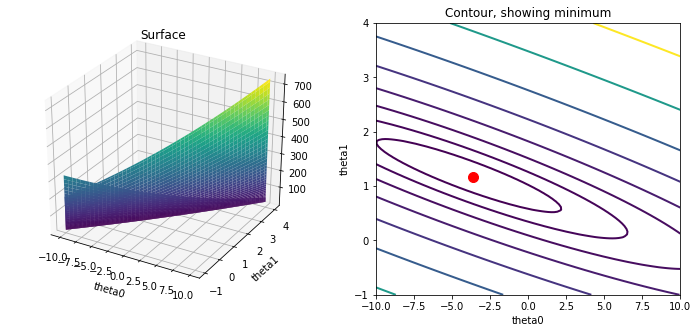

In [18]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

In [19]:
# Linear Regression with Multiple variables
data = np.loadtxt(os.path.join('data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [20]:
def featureNomalize(X):
    X_normalized = X.copy()
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/sigma
        
    return X_norm , mu , sigma

In [21]:
X_norm, mu, sigma = featureNomalize(X)

print ('Computed mean:', mu)
print ('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [22]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)
print(X.shape)

(47, 3)


In [23]:
theta2 = np.zeros(3)
theta2, J_history = gradientDescent(X, y, theta2, 0.3, 50)

Text(0,0.5,'Cost J')

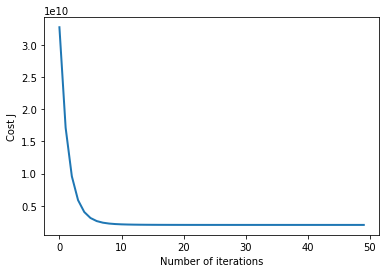

In [24]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [25]:
print('theta computed from gradient descent: {:s}'.format(str(theta2)))

theta computed from gradient descent: [340412.65345227 109398.90129361  -6529.45967813]


In [26]:
price = 0   # You should change this


x_sample = np.array([1650, 3])
x_sample = (x_sample - mu) / sigma
x_sample = np.append(np.ones(1), x_sample)

print(x_sample)
price = np.dot(theta2.T, x_sample)

print(price)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

[ 1.         -0.44604386 -0.22609337]
293092.21273075533
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293092


In [27]:
# Scikit Learn Regression
X_sci = data[:, :2]
y_sci = data[:, 2]
model = LinearRegression()
model.fit(X_sci, y_sci)
coef = model.coef_
intercept = model.intercept_
print(coef)
print(intercept)

price_sci = model.predict(np.array([[1650, 3]]))
score = model.score(X_sci, y_sci)
print(score)


[  139.21067402 -8738.01911233]
89597.90954279745
0.7329450180289143


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [33]:
# KC House dataset regression
data = pd.read_csv('data/kc_house_data.csv')


X = np.array(data[['bedrooms', 'sqft_living', 'floors']].values)
y = data[['price']].values.flatten()

m = y.size
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
X_norm, mean, sigma = featureNomalize(X)

X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

theta_kc = np.zeros(4)

theta computed from gradient descent: [540088.14176586 -52995.43621721 287669.65467114   1750.88517927]
[ 1.          0.67648506 -0.52252773  0.93650577]
355561.8628883723
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $355562


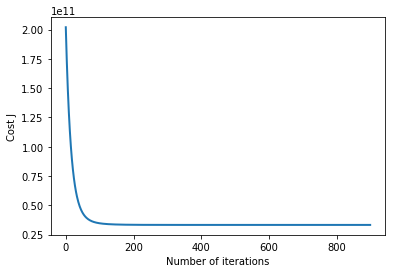

In [32]:
theta_kc, J_history = gradientDescent(X_norm, y, theta_kc, 0.03, 900)

print('theta computed from gradient descent: {:s}'.format(str(theta_kc)))

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

x_sample = np.array([4, 1600, 2.0])
x_sample = (x_sample - mean) / sigma
x_sample = np.append(np.ones(1), x_sample)

print(x_sample)
price = np.dot(theta_kc.T, x_sample)

print(price)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

In [30]:
model = LinearRegression()
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_
print(coef)
print(intercept)

price_sci = model.predict(np.array([[4, 1600, 2.0]]))
score = model.score(X, y)
print(price_sci[0])
print(score)

[-56985.92483622    313.22728382   3239.7578125 ]
75856.12494108098
355555.59532535775
0.5068231186451337
